# **Data Visualisation**
Since we used different datasets for different kinds of analyses in our project, data visualisation will be conducted for all 3 datasets. The three datasets are as follows:
> 1. dataset.csv
> 2. time_comparison.csv
> 3. merged.csv

#### **Import Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

---

# **Dataset 1: dataset.csv**
This dataset was used for the analysis of <u>***continuous numerical***</u> audio features and track popularity
> **Predictors:** Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo\
> **Response:** Track Popularity

In [2]:
songdata = pd.read_csv("datasets/dataset.csv", index_col=0)
songdata

,Track Name,Artist Name,Album,Album Release Date,Artist Genres,Danceability,Energy,Key,Loudness,Mode,...,Instrumentalness,Liveness,Valence,Tempo,Duration,Time Signature,Artist Popularity,Track Popularity,Track URI,Artist URI
0,act ii: date @ 8 (feat. Drake) - remix,4batz,act ii: date @ 8 (feat. Drake) [remix],2024-03-08,NaN,0.550,0.545,0,-9.304,1,...,0.000000,0.0608,0.412,102.469,231339,4,74,86,spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS,spotify:artist:5fi7lIgJGH3RgUpJYcffQ7
1,LEAP!,Souly Had,LEAP!,2020-10-02,NaN,0.892,0.585,11,-7.269,1,...,0.000004,0.0881,0.244,104.011,205385,4,50,38,spotify:track:3vl2uH4D2QItFFhzz5L06g,spotify:artist:20WmX0l9JgOpehDOAXY6iO
2,Overdrive,Conan Gray,Overdrive,2021-02-19,"bedroom pop, pop, pov: indie",0.568,0.788,5,-6.280,1,...,0.000000,0.1410,0.460,104.959,183070,4,80,66,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,spotify:artist:4Uc8Dsxct0oMqx0P6i60ea
3,Raise y_our glass,HUH YUNJIN,Raise y_our glass,2022-08-09,NaN,0.567,0.503,8,-6.119,1,...,0.000000,0.3690,0.184,72.798,212164,4,69,59,spotify:track:7j1vFohEm1lbsctYY9gyGd,spotify:artist:13yWtUnz63q5VIs5SwoMhy
4,In My Mind,Lyn Lapid,In My Mind,2021-08-20,gen z singer-songwriter,0.668,0.392,2,-12.178,0,...,0.002750,0.3450,0.323,135.936,162794,3,62,72,spotify:track:2W779g2UrRZtVdf3FcEOO1,spotify:artist:4pfy05cNNTacuOQ6SiSu4v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,Tenerife Sea,Ed Sheeran,x (Deluxe Edition),2014-06-21,"pop, singer-songwriter pop, uk pop",0.530,0.346,8,-10.497,1,...,0.000011,0.1050,0.359,121.876,241347,4,87,67,spotify:track:1HbcclMpw0q2WDWpdGCKdS,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
9938,Bloodstream,Ed Sheeran,x (Deluxe Edition),2014-06-21,"pop, singer-songwriter pop, uk pop",0.660,0.316,3,-11.567,0,...,0.000294,0.1040,0.543,91.207,300253,4,87,64,spotify:track:5v4sZRuvWDcisoOk1PFv6T,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
9939,Afterglow,Ed Sheeran,Afterglow,2020-12-21,"pop, singer-songwriter pop, uk pop",0.641,0.324,11,-5.851,1,...,0.000000,0.3280,0.273,110.184,185487,4,87,70,spotify:track:0E4Y1XIbs8GrAT1YqVy6dq,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
9940,"You Need Me, I Don't Need You",Ed Sheeran,+,2011-09-09,"pop, singer-songwriter pop, uk pop",0.749,0.837,7,-8.837,1,...,0.000000,0.5250,0.927,103.483,220413,4,87,61,spotify:track:5KL4iZkCTZyXl7KnHgfVDj,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V


## **Features for Analysis**

In [7]:
predictors = songdata.select_dtypes(include=['int64','float64'])

# drop columns that are of numerical data type but non-continuous (time signature, key, mode) and/or not an audio feature (duration)
# drop artist popularity as it is not a predictor or response variable
predictors.drop(columns=["Time Signature", "Key", "Mode", "Duration", "Artist Popularity"], axis=1, inplace=True) 
predictors

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.550,0.545,-9.304,0.1630,0.3180,0.000000,0.0608,0.412,102.469,86
1,0.892,0.585,-7.269,0.1020,0.1460,0.000004,0.0881,0.244,104.011,38
2,0.568,0.788,-6.280,0.0377,0.0101,0.000000,0.1410,0.460,104.959,66
3,0.567,0.503,-6.119,0.1240,0.5810,0.000000,0.3690,0.184,72.798,59
4,0.668,0.392,-12.178,0.0585,0.7890,0.002750,0.3450,0.323,135.936,72
...,...,...,...,...,...,...,...,...,...,...
9937,0.530,0.346,-10.497,0.0376,0.6970,0.000011,0.1050,0.359,121.876,67
9938,0.660,0.316,-11.567,0.0364,0.5290,0.000294,0.1040,0.543,91.207,64
9939,0.641,0.324,-5.851,0.0299,0.6980,0.000000,0.3280,0.273,110.184,70
9940,0.749,0.837,-8.837,0.0512,0.1620,0.000000,0.5250,0.927,103.483,61


In [8]:
predictors.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
count,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000
mean,0.623007,0.651929,-6.937828,0.083839,0.249253,0.047170,0.182433,0.510050,122.082543,44.080366
std,0.154220,0.212910,3.840414,0.083496,0.284699,0.178074,0.137654,0.239093,28.117263,27.981752
min,0.000000,0.002120,-43.738000,0.000000,0.000002,0.000000,0.016500,0.000000,0.000000,0.000000
25%,0.531000,0.515000,-8.173750,0.035500,0.026500,0.000000,0.095200,0.321000,100.011250,22.000000
50%,0.635000,0.683000,-6.078500,0.049800,0.121000,0.000001,0.126000,0.504000,122.014500,50.000000
75%,0.730000,0.820000,-4.613000,0.090775,0.393000,0.000185,0.237750,0.703000,139.127000,67.000000
max,0.979000,1.000000,1.085000,0.903000,0.996000,0.987000,0.989000,1.000000,214.017000,100.000000


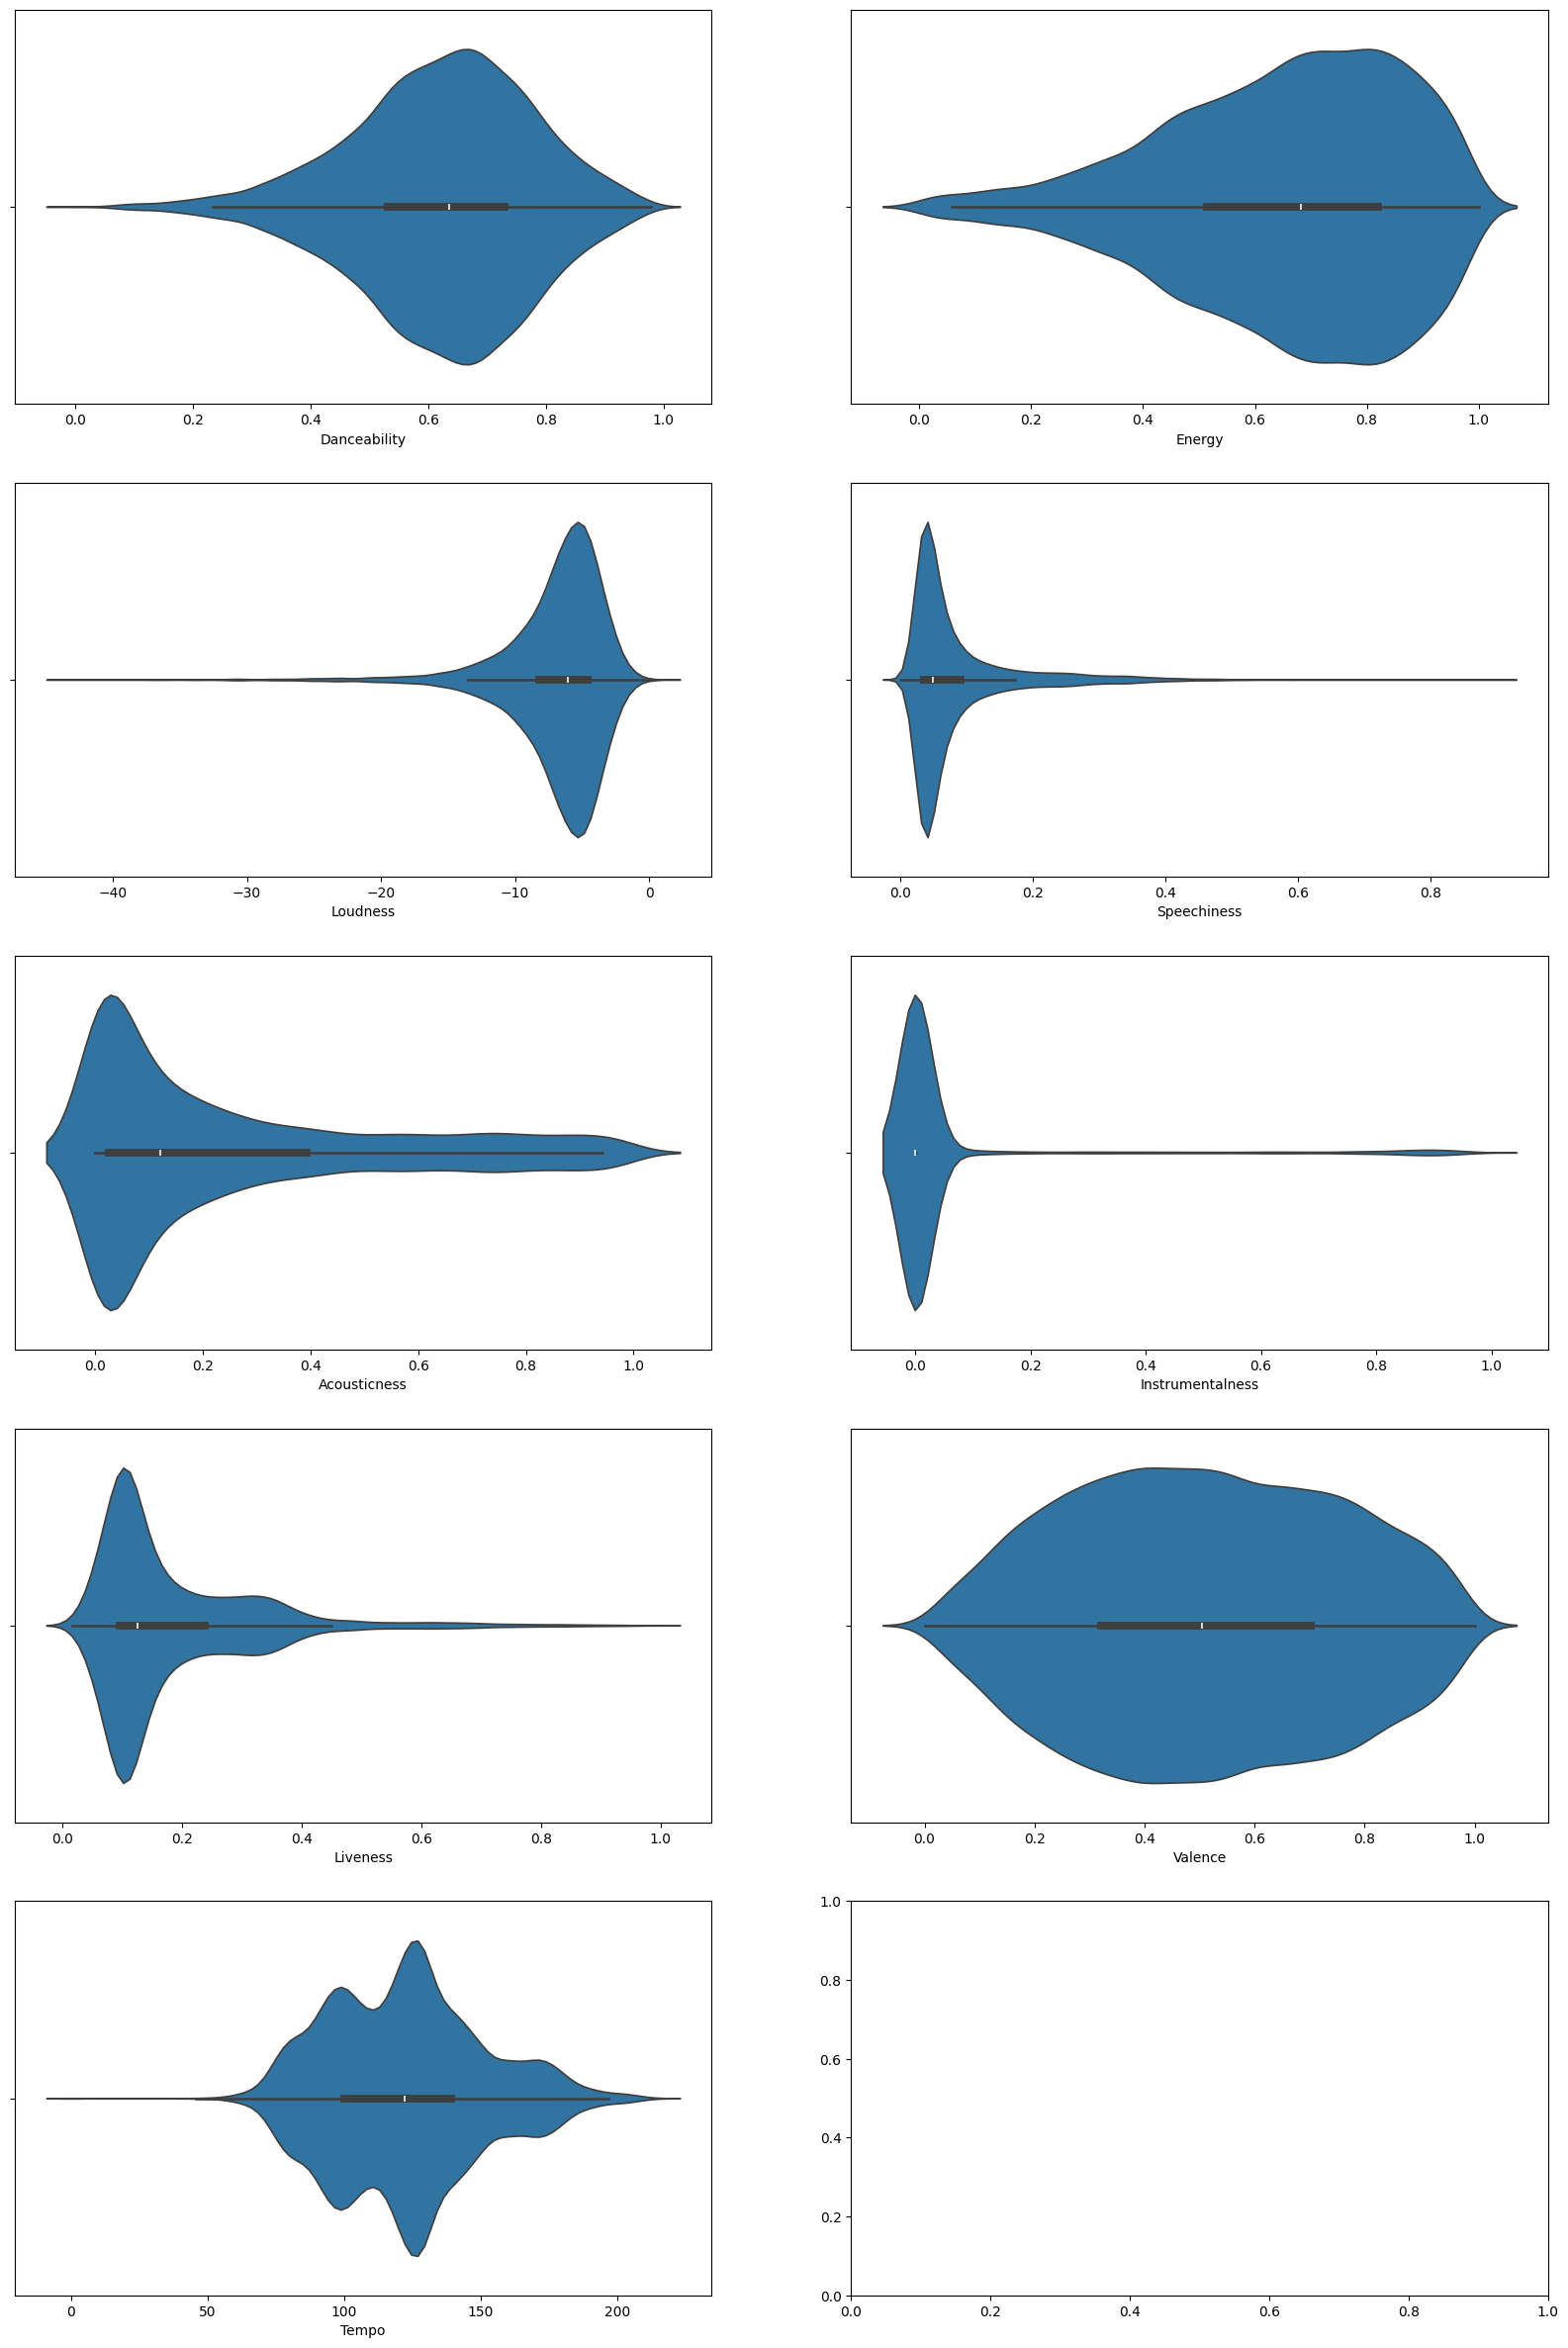

In [9]:
f, axes = plt.subplots(5,2,figsize=(20,30))
total = 0
row = 0

audio_features = [c for c in predictors.columns if c != "Track Popularity"]

for var in audio_features:
    if total % 2 == 0:
        col = 0
    else:
        col = 1
    
    vp = sb.violinplot(data=predictors[var], orient='h', ax=axes[row,col])
    vp.set_xlabel(var, fontsize=10)
    total += 1

    if total % 2 == 0:
        row += 1


In [10]:
predictors["Track Popularity"].describe()

count    9942.000000
mean       44.080366
std        27.981752
min         0.000000
25%        22.000000
50%        50.000000
75%        67.000000
max       100.000000
Name: Track Popularity, dtype: float64

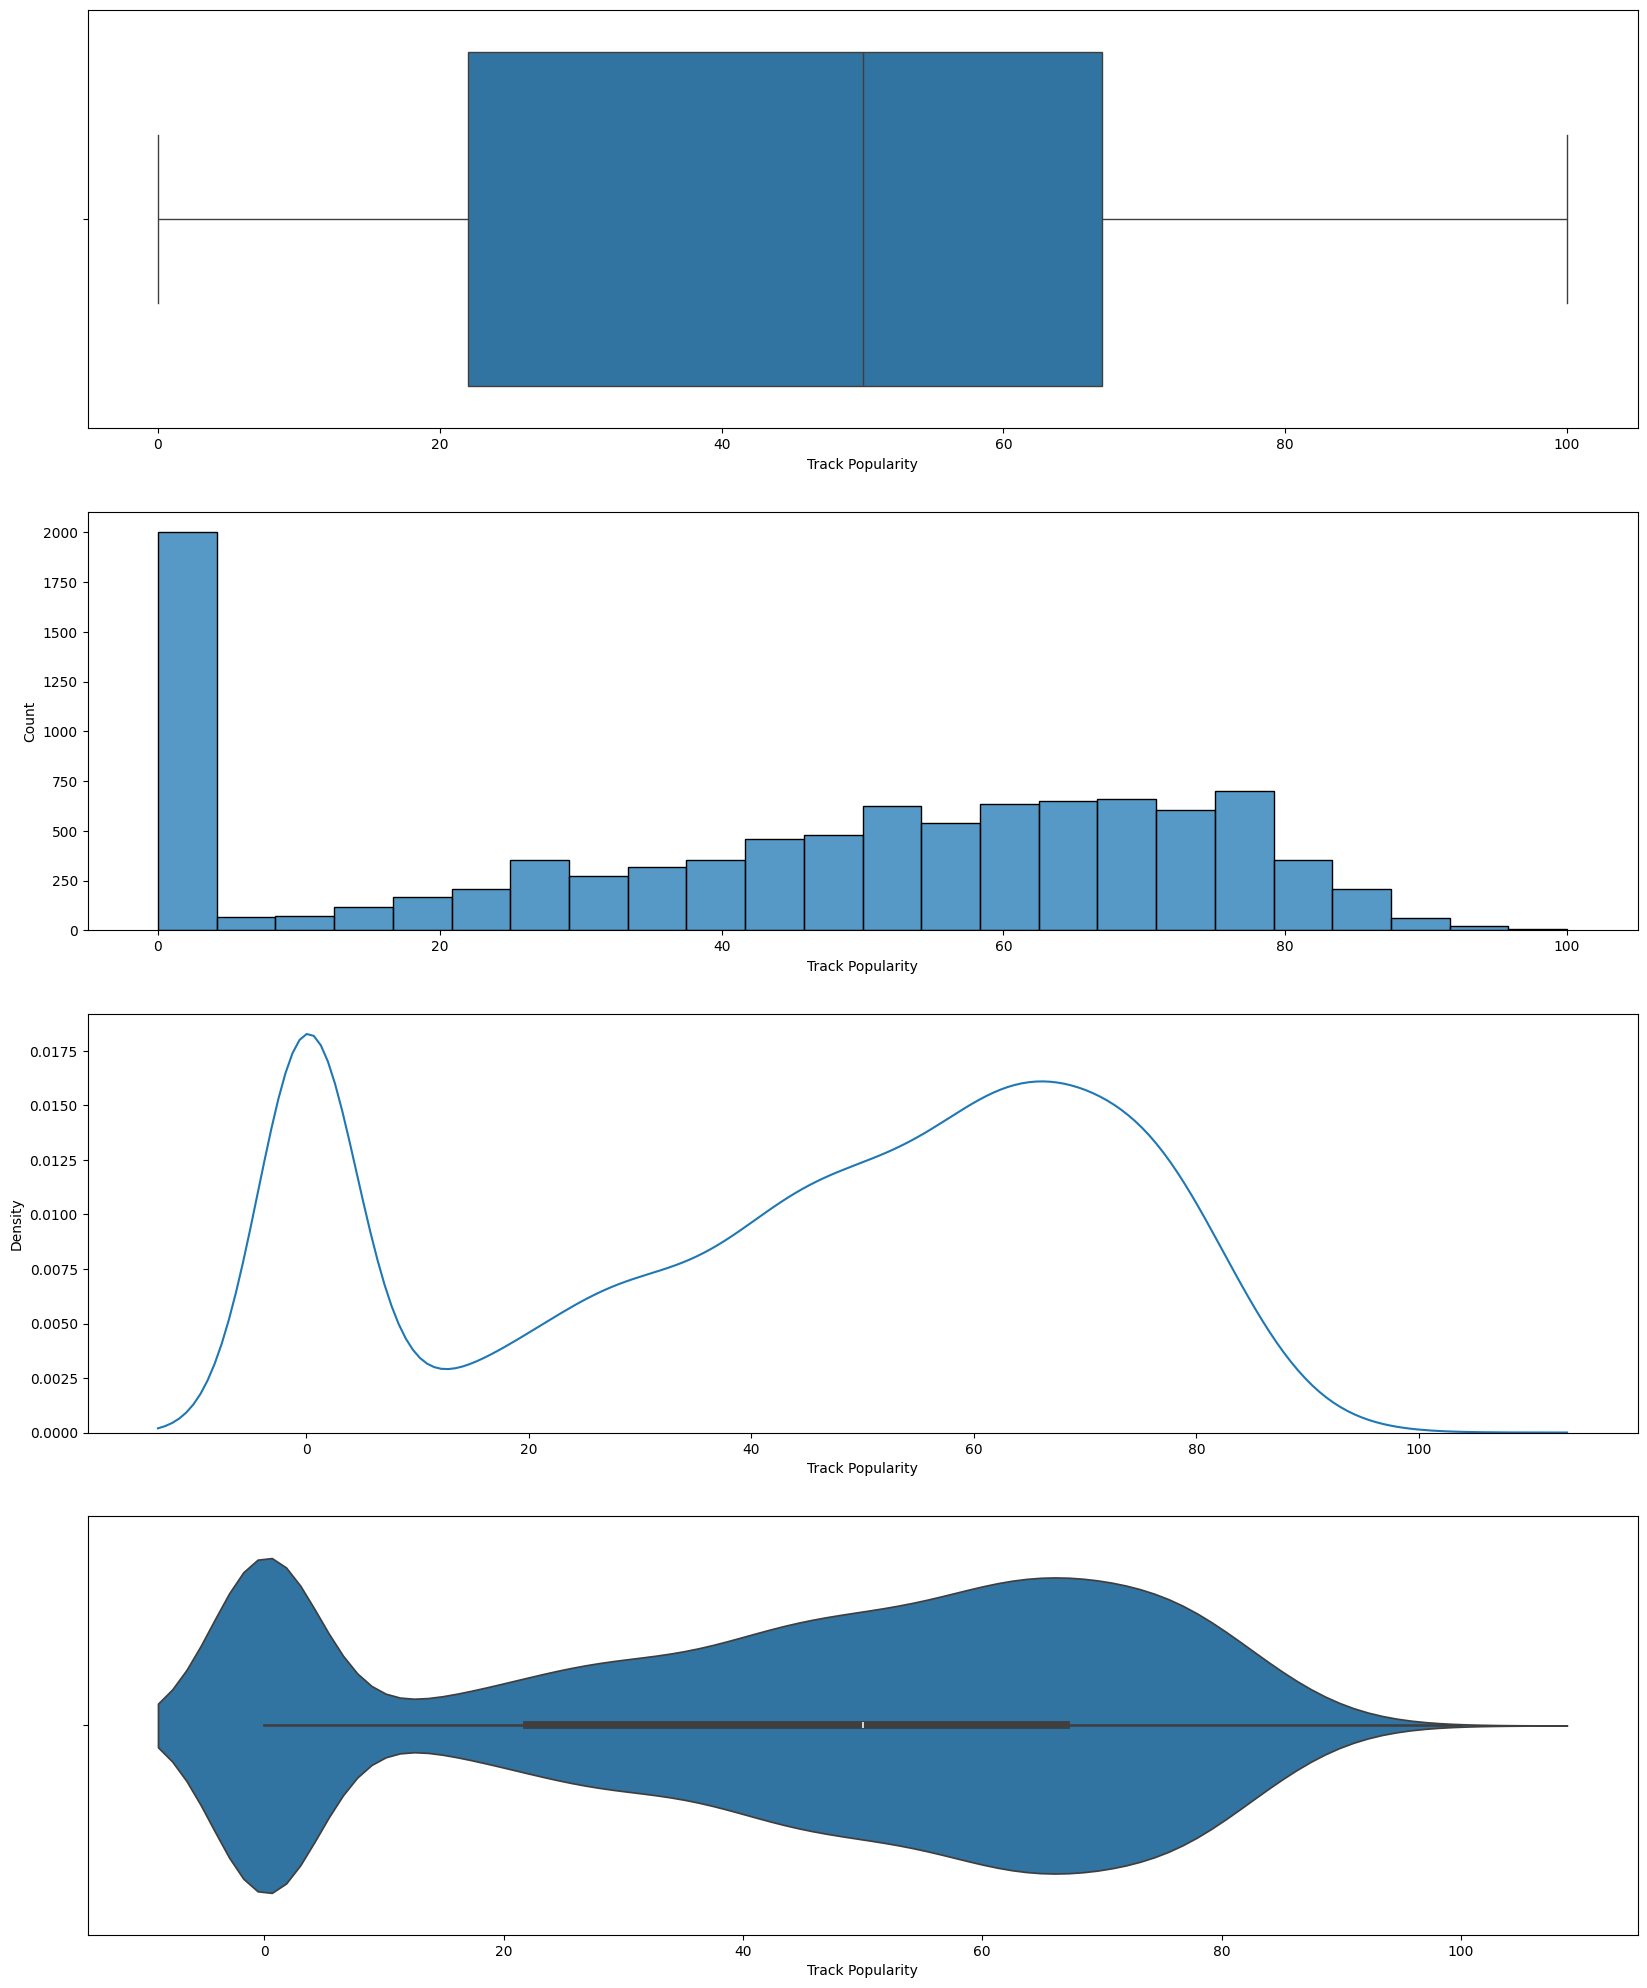

In [15]:
f, axes = plt.subplots(4, figsize=(20,25))
box_tp = sb.boxplot(data=predictors["Track Popularity"], orient="h", ax=axes[0])
histo_tp = sb.histplot(data=predictors["Track Popularity"], ax=axes[1])
kde_tp = sb.kdeplot(data=predictors["Track Popularity"], ax=axes[2])
violin_tp = sb.violinplot(data=predictors["Track Popularity"], orient="h", ax=axes[3])